In [127]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [171]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [130]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [131]:
# Declare a Base using `automap_base()`
Base = automap_base()
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [132]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [133]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [134]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [135]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f276548130>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [136]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f276548430>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [137]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is {recent_date.date}.")

2017-08-23


2016-08-23


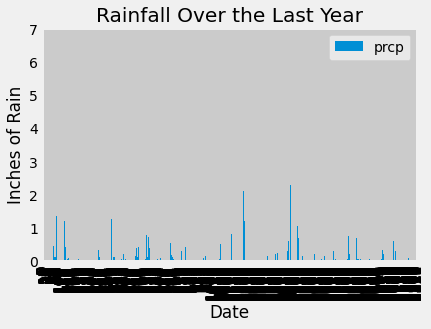

<Figure size 432x288 with 0 Axes>

In [159]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(recent_date.date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
query_date = last_date - dt.timedelta(days=364)

# Perform a query to retrieve the data and precipitation scores
recent_measurement = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime('%Y-%m-%d', Measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
recent_measurement_df = pd.DataFrame(recent_measurement, columns=['Date', 'Precipitation'])
recent_measurement_df.set_index('Date', inplace=True)

# Sort the dataframe by date
sorted_measurement_df = recent_measurement_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
sorted_measurement_df.plot(rot=45, figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('Precipitation Throughout the Year')
plt.show()

In [141]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [169]:
# Design a query to calculate the total number stations in the dataset
print(session.query(Station).count())

9


In [195]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results=session.query(Measurement.date, Measurement.station)

In [196]:
results

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()